# DATA SCIENCE INTERNSHIP AT DATA GLACIER


## Week 12 Assignment

### Project: Healthcare- Persistency of a drug 

### Deliverables: Model Selection and Model Building (Logistic Regression)

#### Name: Chooladeva Piyasiri
#### University: National Institute of Business Management (NIBM)
#### Email: chooladevapiyasiri@gmail.com
#### Country: Sri Lanka
#### Specialization: Data Science
#### Batch Code: LISUM18
#### Date: 23 April 2023
---

## Importing the required libraries

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis
from scipy.stats import skew
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
get_mean = lambda x: np.mean(x)
from sklearn.utils import resample

# machine learning
from sklearn.linear_model import LogisticRegression

# model evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report, roc_curve, confusion_matrix,cohen_kappa_score

warnings.filterwarnings("ignore")

## Reading the dataset

In [2]:
df_Healthcare = pd.read_excel('Healthcare_dataset.xlsx')
df_Healthcare.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


## Descriptive Analysis of data

In [3]:
# Determining number of rows and columns of the DataFrame

df_Healthcare.shape

(3424, 69)

In [4]:
# Displaying the Variable Names and their Data Types

df_Healthcare.dtypes

Ptid                                                                  object
Persistency_Flag                                                      object
Gender                                                                object
Race                                                                  object
Ethnicity                                                             object
Region                                                                object
Age_Bucket                                                            object
Ntm_Speciality                                                        object
Ntm_Specialist_Flag                                                   object
Ntm_Speciality_Bucket                                                 object
Gluco_Record_Prior_Ntm                                                object
Gluco_Record_During_Rx                                                object
Dexa_Freq_During_Rx                                                    int64

In [5]:
# Displaying the Complete Meta-Data of the dataset

df_Healthcare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

>  **There are two numerical columns in the dataset, per the data type description. Which are:**
>- Dexa_Freq_During_Rx
>- Count_Of_Risks 

In [6]:
# Descriptive Statistics of the numeric columns of the dataset

df_Healthcare.describe()

,Dexa_Freq_During_Rx,Count_Of_Risks
count,3424.000000,3424.000000
mean,3.016063,1.239486
std,8.136545,1.094914
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,3.000000,2.000000
max,146.000000,7.000000


## Data Cleaning

### 1. Detecting NA Values

In [7]:
df_Healthcare.isna().sum()

Ptid                                                                  0
Persistency_Flag                                                      0
Gender                                                                0
Race                                                                  0
Ethnicity                                                             0
Region                                                                0
Age_Bucket                                                            0
Ntm_Speciality                                                        0
Ntm_Specialist_Flag                                                   0
Ntm_Speciality_Bucket                                                 0
Gluco_Record_Prior_Ntm                                                0
Gluco_Record_During_Rx                                                0
Dexa_Freq_During_Rx                                                   0
Dexa_During_Rx                                                  

> **There are no NA values in the dataset.**

### 2. Finding Skewness & Kurtosis

In [8]:
print("Count_Of_Risks Skweness: ", df_Healthcare["Count_Of_Risks"].skew())
print("Count_Of_Risks Kurtosis: ", df_Healthcare["Count_Of_Risks"].kurt())

Count_Of_Risks Skweness:  0.8797905232898707
Count_Of_Risks Kurtosis:  0.9004859968892842


> **The Count_Of_Risks distribution is moderately skewed.**

> **The Count_Of_Risks distribution is Platykurtic(kurtosis <3). Compared to a normal distribution, its tails are shorter and thinner, and often its central peak is lower and broader.**

In [9]:
print("Dexa_Freq_During_Rx Skweness: ", df_Healthcare["Dexa_Freq_During_Rx"].skew())
print("Dexa_Freq_During_Rx Kurtosis: ", df_Healthcare["Dexa_Freq_During_Rx"].kurt())

Dexa_Freq_During_Rx Skweness:  6.8087302112992285
Dexa_Freq_During_Rx Kurtosis:  74.75837754795428


> **The Dexa_Freq_During_Rx distribution is higly skewed.**

> **The Dexa_Freq_During_Rx distribution is Leptokurtic (kurtosis >3). Compared to a normal distribution, its tails are longer and fatter, and often its central peak is higher and sharper.**

### 3. Detecting Outliers

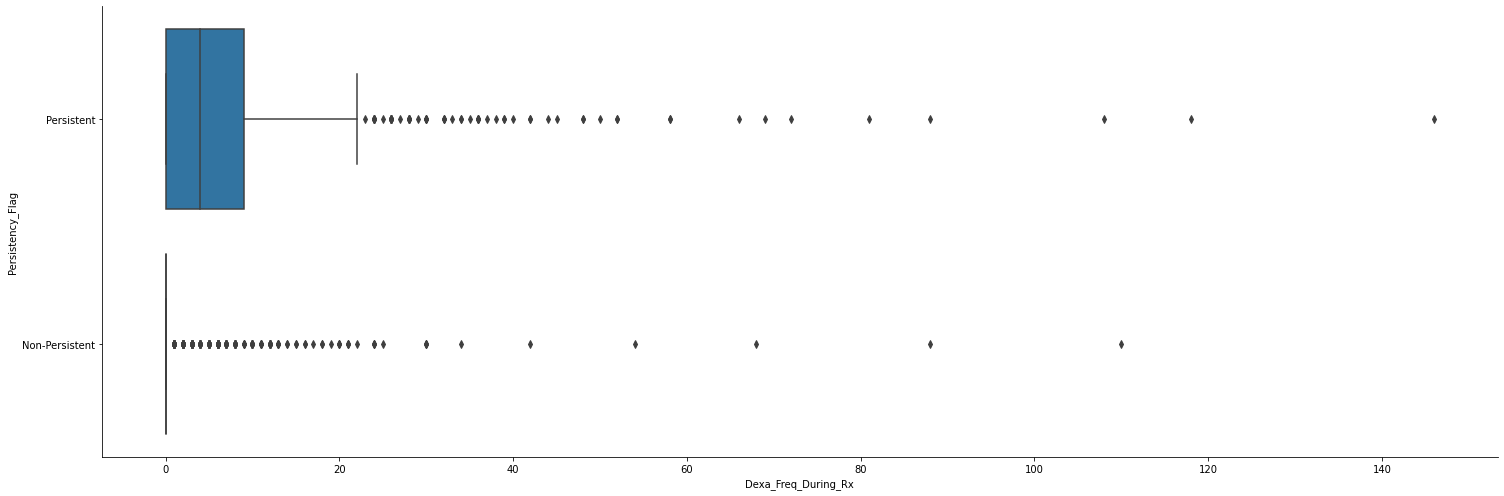

In [10]:
sns.catplot(x="Dexa_Freq_During_Rx", y="Persistency_Flag",
            kind="box", data=df_Healthcare,height=7, aspect=3);

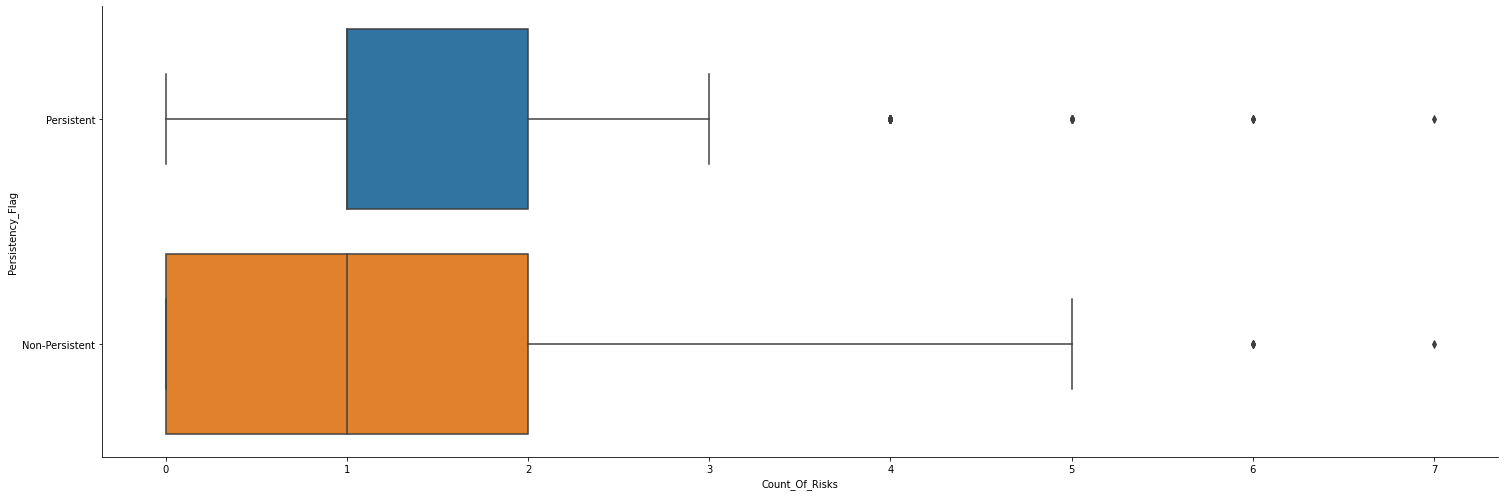

In [11]:
sns.catplot(x="Count_Of_Risks", y="Persistency_Flag",
            kind="box", data=df_Healthcare,height=7, aspect=3);

### 4. Handling Outliers

- **Capping**

Because there are many outliers in Dexa_Freq_During_Rx column, and removing a good amount of data from the dataset is not good, I used the Capping method to handle the outliers.

In [12]:
upper_limit = df_Healthcare['Dexa_Freq_During_Rx'].mean() + 3*df_Healthcare['Dexa_Freq_During_Rx'].std()
lower_limit = df_Healthcare['Dexa_Freq_During_Rx'].mean() - 3*df_Healthcare['Dexa_Freq_During_Rx'].std()

df_Healthcare['Dexa_Freq_During_Rx']=np.where(df_Healthcare['Dexa_Freq_During_Rx']>upper_limit,
                                              upper_limit, 
                                              np.where(df_Healthcare['Dexa_Freq_During_Rx']<lower_limit,
                                                     lower_limit, df_Healthcare['Dexa_Freq_During_Rx']))

In [13]:
df_Healthcare.shape

(3424, 69)

> **As I did capping, no data was lost**

- **Trimming/Removing the outliers**

In [14]:
Q1 = np.percentile(df_Healthcare['Count_Of_Risks'], 25, interpolation = 'midpoint')
Q2 = np.percentile(df_Healthcare['Count_Of_Risks'], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df_Healthcare['Count_Of_Risks'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1
print('Interquartile range is', IQR)
  
upper_bound = np.where(df_Healthcare['Count_Of_Risks'] >= (Q3+1.5*IQR))
lower_bound = np.where(df_Healthcare['Count_Of_Risks'] <= (Q1-1.5*IQR))

Interquartile range is 2.0


In [15]:
#Removing the Outliers in Count_Of_Risks

df_Healthcare.drop(upper_bound[0], inplace = True)
df_Healthcare.drop(lower_bound[0], inplace = True)

#Resetting the index columns
df_Healthcare = df_Healthcare.reset_index(drop=True)

In [16]:
df_Healthcare.shape

(3401, 69)

> **After dropping the outliers in the Count_Of_Risks columns, the number of rows in the dataset was reduced from 3424 to 3401.**

### Dropping Ptid: Patient ID column as its not necessary for modeling

In [17]:
df_Healthcare = df_Healthcare.drop(['Ptid'], axis=1)
df_Healthcare.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_Freq_During_Rx,Dexa_During_Rx,Frag_Frac_Prior_Ntm,Frag_Frac_During_Rx,Risk_Segment_Prior_Ntm,Tscore_Bucket_Prior_Ntm,Risk_Segment_During_Rx,Tscore_Bucket_During_Rx,Change_T_Score,Change_Risk_Segment,Adherent_Flag,Idn_Indicator,Injectable_Experience_During_Rx,Comorb_Encounter_For_Screening_For_Malignant_Neoplasms,Comorb_Encounter_For_Immunization,"Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx",Comorb_Vitamin_D_Deficiency,Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified,Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx,Comorb_Long_Term_Current_Drug_Therapy,Comorb_Dorsalgia,Comorb_Personal_History_Of_Other_Diseases_And_Conditions,Comorb_Other_Disorders_Of_Bone_Density_And_Structure,Comorb_Disorders_of_lipoprotein_metabolism_and_other_lipidemias,Comorb_Osteoporosis_without_current_pathological_fracture,Comorb_Personal_history_of_malignant_neoplasm,Comorb_Gastro_esophageal_reflux_disease,Concom_Cholesterol_And_Triglyceride_Regulating_Preparations,Concom_Narcotics,Concom_Systemic_Corticosteroids_Plain,Concom_Anti_Depressants_And_Mood_Stabilisers,Concom_Fluoroquinolones,Concom_Cephalosporins,Concom_Macrolides_And_Similar_Types,Concom_Broad_Spectrum_Penicillins,Concom_Anaesthetics_General,Concom_Viral_Vaccines,Risk_Type_1_Insulin_Dependent_Diabetes,Risk_Osteogenesis_Imperfecta,Risk_Rheumatoid_Arthritis,Risk_Untreated_Chronic_Hyperthyroidism,Risk_Untreated_Chronic_Hypogonadism,Risk_Untreated_Early_Menopause,Risk_Patient_Parent_Fractured_Their_Hip,Risk_Smoking_Tobacco,Risk_Chronic_Malnutrition_Or_Malabsorption,Risk_Chronic_Liver_Disease,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0.0,N,N,N,VLR_LR,>-2.5,VLR_LR,<=-2.5,No change,Unknown,Adherent,N,Y,N,Y,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
1,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0.0,N,N,N,VLR_LR,>-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,0
2,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,N,0.0,N,N,N,HR_VHR,<=-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,Y,N,Y,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,Y,N,N,N,N,N,N,N,2
3,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,N,Y,0.0,N,N,N,HR_VHR,>-2.5,HR_VHR,<=-2.5,No change,No change,Adherent,N,Y,N,Y,Y,N,Y,N,N,Y,N,N,Y,N,N,Y,N,Y,Y,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1
4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,Y,Y,0.0,N,N,N,HR_VHR,<=-2.5,Unknown,Unknown,Unknown,Unknown,Adherent,N,Y,Y,Y,Y,N,N,N,N,Y,Y,N,N,N,N,N,N,Y,Y,Y,N,N,N,N,N,N,N,N,N,N,N,N,N,Y,N,N,N,N,N,N,N,N,N,N,N,1


In [18]:
df_Healthcare.shape

(3401, 68)

### Replacing the unique categorical variable values with numerical values (Y/N to 1/0)

In [19]:
map_1 = {'N': 0, 'Y':1}
df_Healthcare = df_Healthcare.replace(map_1)

### Assigning numeriac values to the target variable

In [20]:
df_Healthcare['Persistency_Flag']=df_Healthcare['Persistency_Flag'].replace(['Non-Persistent','Persistent'],[0, 1])

### Generating Dummy variables

In [21]:
#Separating x and y
X=df_Healthcare.drop(['Persistency_Flag'],1)
y=df_Healthcare['Persistency_Flag']

In [22]:
X = pd.get_dummies(X)

# making all column headers in the data frame lower case
X.columns=[x.lower() for x in X.columns]

In [23]:
X.head()

,gluco_record_prior_ntm,gluco_record_during_rx,dexa_freq_during_rx,dexa_during_rx,frag_frac_prior_ntm,frag_frac_during_rx,idn_indicator,injectable_experience_during_rx,comorb_encounter_for_screening_for_malignant_neoplasms,comorb_encounter_for_immunization,"comorb_encntr_for_general_exam_w_o_complaint,_susp_or_reprtd_dx",comorb_vitamin_d_deficiency,comorb_other_joint_disorder_not_elsewhere_classified,comorb_encntr_for_oth_sp_exam_w_o_complaint_suspected_or_reprtd_dx,comorb_long_term_current_drug_therapy,comorb_dorsalgia,comorb_personal_history_of_other_diseases_and_conditions,comorb_other_disorders_of_bone_density_and_structure,comorb_disorders_of_lipoprotein_metabolism_and_other_lipidemias,comorb_osteoporosis_without_current_pathological_fracture,comorb_personal_history_of_malignant_neoplasm,comorb_gastro_esophageal_reflux_disease,concom_cholesterol_and_triglyceride_regulating_preparations,concom_narcotics,concom_systemic_corticosteroids_plain,concom_anti_depressants_and_mood_stabilisers,concom_fluoroquinolones,concom_cephalosporins,concom_macrolides_and_similar_types,concom_broad_spectrum_penicillins,concom_anaesthetics_general,concom_viral_vaccines,risk_type_1_insulin_dependent_diabetes,risk_osteogenesis_imperfecta,risk_rheumatoid_arthritis,risk_untreated_chronic_hyperthyroidism,risk_untreated_chronic_hypogonadism,risk_untreated_early_menopause,risk_patient_parent_fractured_their_hip,risk_smoking_tobacco,risk_chronic_malnutrition_or_malabsorption,risk_chronic_liver_disease,risk_family_history_of_osteoporosis,risk_low_calcium_intake,risk_vitamin_d_insufficiency,risk_poor_health_frailty,risk_excessive_thinness,risk_hysterectomy_oophorectomy,risk_estrogen_deficiency,risk_immobilization,risk_recurring_falls,count_of_risks,gender_female,gender_male,race_african american,race_asian,race_caucasian,race_other/unknown,ethnicity_hispanic,ethnicity_not hispanic,ethnicity_unknown,region_midwest,region_northeast,region_other/unknown,region_south,region_west,age_bucket_55-65,age_bucket_65-75,age_bucket_<55,age_bucket_>75,ntm_speciality_cardiology,ntm_speciality_clinical nurse specialist,ntm_speciality_emergency medicine,ntm_speciality_endocrinology,ntm_speciality_gastroenterology,ntm_speciality_general practitioner,ntm_speciality_geriatric medicine,ntm_speciality_hematology & oncology,ntm_speciality_hospice and palliative medicine,ntm_speciality_hospital medicine,ntm_speciality_nephrology,ntm_speciality_neurology,ntm_speciality_nuclear medicine,ntm_speciality_obstetrics & obstetrics & gynecology & obstetrics & gynecology,ntm_speciality_obstetrics and gynecology,ntm_speciality_occupational medicine,ntm_speciality_oncology,ntm_speciality_ophthalmology,ntm_speciality_orthopedic surgery,ntm_speciality_orthopedics,ntm_speciality_otolaryngology,ntm_speciality_pain medicine,ntm_speciality_pathology,ntm_speciality_pediatrics,ntm_speciality_physical medicine and rehabilitation,ntm_speciality_plastic surgery,ntm_speciality_podiatry,ntm_speciality_psychiatry and neurology,ntm_speciality_pulmonary medicine,ntm_speciality_radiology,ntm_speciality_rheumatology,ntm_speciality_surgery and surgical specialties,ntm_speciality_transplant surgery,ntm_speciality_urology,ntm_speciality_unknown,ntm_speciality_vascular surgery,ntm_specialist_flag_others,ntm_specialist_flag_specialist,ntm_speciality_bucket_endo/onc/uro,ntm_speciality_bucket_ob/gyn/others/pcp/unknown,ntm_speciality_bucket_rheum,risk_segment_prior_ntm_hr_vhr,risk_segment_prior_ntm_vlr_lr,tscore_bucket_prior_ntm_<=-2.5,tscore_bucket_prior_ntm_>-2.5,risk_segment_during_rx_hr_vhr,risk_segment_during_rx_unknown,risk_segment_during_rx_vlr_lr,tscore_bucket_during_rx_<=-2.5,tscore_bucket_during_rx_>-2.5,tscore_bucket_during_rx_unknown,change_t_score_improved,change_t_score_no change,change_t_score_unknown,change_t_score_worsened,change_risk_segment_improved,change_risk_segment_no change,change_risk_segment_unknown,change_risk_segment_worsened,adherent_flag_adherent,adherent_flag_non-adherent
0,0,0,0.0,0,

### Splitting the data into training and testing sets

In [24]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2, stratify=y)

**Here I will use 20% of the data as test data and 80% as the train data.**

In [25]:
Healthcare_train = X_train.copy()
Healthcare_train['Persistency_Flag'] = y_train

### Dealing with class imbalance in the training set

In [26]:
values=Healthcare_train['Persistency_Flag'].value_counts()
Persistent = values[0]/Healthcare_train['Persistency_Flag'].count()
Non_Persistent = values[1]/Healthcare_train['Persistency_Flag'].count()

print('Persistent:', Persistent)
print('Non-Persistent:', Non_Persistent)

Persistent: 0.625
Non-Persistent: 0.375


In [27]:
# Upsampling the minority

Non_Persistent = Healthcare_train[Healthcare_train['Persistency_Flag']==0]
Persistent = Healthcare_train[Healthcare_train['Persistency_Flag']==1]

upsampling_min = resample(Persistent,
                           replace=True, # sample with replacement
                           n_samples=len(Non_Persistent), # match number in majority class
                           random_state=27) # reproducible results

# combine majority and upsampled minority
Healthcare_train= pd.concat([Non_Persistent, upsampling_min])

# check new class counts
print(Healthcare_train['Persistency_Flag'].value_counts())

1    1700
0    1700
Name: Persistency_Flag, dtype: int64


In [28]:
X_train=Healthcare_train.drop(['Persistency_Flag'],axis=1)
y_train=Healthcare_train['Persistency_Flag']

## Model building and Predicting the test set results 

In [29]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [30]:
y_pred=model.predict(X_test)

## Model Evaluation

In [31]:
print("Accuracy :",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred))
print("Recall :",recall_score(y_test,y_pred))
print("F1 Score :",f1_score(y_test,y_pred))

Accuracy : 0.8105726872246696
Precision : 0.7259786476868327
Recall : 0.796875
F1 Score : 0.7597765363128492


In [32]:
# AUC score

auc_score= roc_auc_score(y_test, y_pred)
print("AUC :", auc_score)

AUC : 0.8078492647058824


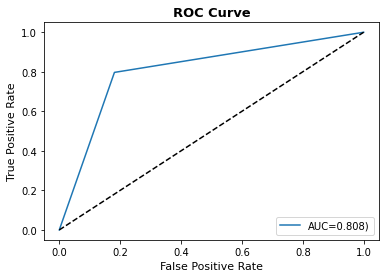

In [33]:
# ROC Curve

fpr, tpr, _ = roc_curve(y_test,  y_pred)

plt.plot(fpr,tpr,label="AUC={:.3f})".format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate', fontsize= 11)
plt.ylabel('True Positive Rate', fontsize= 11)
plt.title('ROC Curve', fontweight="bold", fontsize= 13)
plt.legend(loc=4)
plt.show();

In [34]:
# Cohen Kappa Score

C_kappa = cohen_kappa_score(y_test, y_pred)
print('Cohens Kappa: %f' % C_kappa)

Cohens Kappa: 0.603972


In [35]:
# Classification Report

Target=['Non-Persistent', 'Persistent']
print(classification_report(y_test, y_pred, target_names=Target))

                precision    recall  f1-score   support

Non-Persistent       0.87      0.82      0.84       425
    Persistent       0.73      0.80      0.76       256

      accuracy                           0.81       681
     macro avg       0.80      0.81      0.80       681
  weighted avg       0.82      0.81      0.81       681



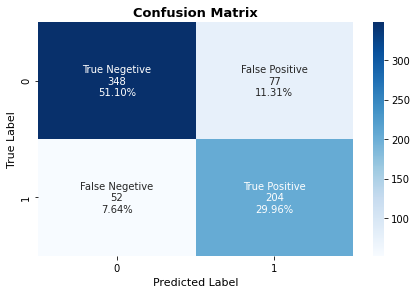

In [37]:
# Confusion Matrix

cf_matrix = confusion_matrix(y_test, y_pred)

group_names = ['True Negetive','False Positive','False Negetive','True Positive']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

plt.title("Confusion Matrix", fontweight="bold", fontsize= 13)
plt.tight_layout()
plt.xlabel("Predicted Label", fontsize= 11)
plt.ylabel("True Label", fontsize= 11) 
plt.show()

---